###Задание

# 1.

1) Запустить ячейку ниже, чтобы получить 2 жанра. Для полученных жанров провести все этапы предварительной обработки текста (как в примере), обучить наивный байесовский классификатор, численно оценить его работу.

In [13]:
 import random
 lst = ['Christian', 'Country', 'Pop', 'Rock', 'R&B']
 print('ваши жанры', random.choice(lst), 'и', random.choice(lst))

ваши жанры Christian и Pop


In [130]:
import pandas as pd
from pandas.core.common import flatten
data = pd.read_csv("dataset.csv")
columns = data[['genre', 'lyrics']]
columns = columns[(columns.genre == 'Christian') | (columns.genre == 'Pop')]

columns['lowered'] = columns['lyrics'].str.lower()
columns

,genre,lyrics,lowered
0,Christian,"Who am I, that the Lord of all the earth Woul...","who am i, that the lord of all the earth woul..."
1,Christian,Glory Revealed By His Wounds He was pierced ...,glory revealed by his wounds he was pierced ...
2,Christian,Lord of heaven and earth Lord of all creation...,lord of heaven and earth lord of all creation...
3,Christian,I can only imagine what it will be like When ...,i can only imagine what it will be like when ...
4,Christian,I am not skilled to understand What God has w...,i am not skilled to understand what god has w...
...,...,...,...
367,Pop,Have you ever met a girl that you tried to da...,have you ever met a girl that you tried to da...
368,Pop,"Im outta luck, outta love Gotta photograph, p...","im outta luck, outta love gotta photograph, p..."
369,Pop,She was a fast machine She kept her motor cl...,she was a fast machine she kept her motor cl...
370,Pop,"Good times, these are the good times Leave yo...","good times, these are the good times leave yo..."


*Токенизация*

In [131]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
tokened = columns.apply(lambda row: nltk.word_tokenize(row['lowered']), axis=1)
columns['tokened'] = tokened

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Удаление стоп-слов

In [132]:
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [133]:
noise = stopwords.words('english')
withoutstop = columns['tokened'].apply(lambda x: [item for item in x if item not in noise])
without_stop = []
for a in withoutstop:
    without_stop.append(", ".join(a))
columns['without_stop'] = without_stop

Лемматизация

In [134]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [135]:
lemmatized = columns['without_stop'].apply(lambda x: [lemmatizer.lemmatize(x)])
lemma = []
for a in lemmatized:
    lemma.append(", ".join(a))
columns['lemmatized'] = lemma

Разделение данных

In [136]:
from sklearn.model_selection import train_test_split
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(columns.lemmatized, columns.genre, train_size = 0.7)
columns.genre.value_counts()

Pop          100
Christian     94
Name: genre, dtype: int64

Векторизация

In [137]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_1 = CountVectorizer(ngram_range=(1, 3))
vectorized_x_train = vectorizer_1.fit_transform(x_train_1)

Классификация

In [138]:
from sklearn.naive_bayes import MultinomialNB
clf_1 = MultinomialNB()
clf_1.fit(vectorized_x_train, y_train_1)
vectorized_x_test = vectorizer_1.transform(x_test_1)

Оценка классификации

In [139]:
from sklearn.metrics import *
pred = clf_1.predict(vectorized_x_test)
print(classification_report(y_test_1, pred))

              precision    recall  f1-score   support

   Christian       1.00      0.92      0.96        36
         Pop       0.88      1.00      0.94        23

    accuracy                           0.95        59
   macro avg       0.94      0.96      0.95        59
weighted avg       0.96      0.95      0.95        59



# 2.

2) Найти (нагуглить) по песне каждого из жанров, которые Вам достались, после необходимой обработки их текстов определить жанр обеих песен с помощью обученной в ходе выполнения предыдущего пункта модели.

In [140]:
music = ['I can only imagine What it will be like When I walk by Your side I can only imagine What my eyes would see When Your face is before me I can only imagine Yeah Surrounded by Your glory What will my heart feel? Will I dance for You Jesus Or in awe of You be still? Will I stand in Your presence Or to my knees, will I fall? Will I sing hallelujah? Will I be able to speak at all? I can only imagine I can only imagine I can only imagine When that day comes And I find myself Standing in the Son I can only imagine When all I will do Is forever, forever worship You I can only imagine, yeah I can only imagine Surrounded by Your glory What will my heart feel? Will I dance for you Jesus Or in awe of You be still? Will I stand in your presence Or to my knees will I fall? Will I sing hallelujah? Will I be able to speak at all? I can only imagine, yeah I can only imagine Surrounded by Your glory What will my heart feel? Will I dance for you Jesus Or in awe of You be still? Will I stand in your presence Or to my knees, will I fall? Will I sing hallelujah? Will I be able to speak at all? I can only imagine, yeah I can only imagine I can only imagine, yeah-yeah I can only imagine I can only imagine I can only imagine I can only imagine When all I will do Is forever, forever worship You I can only imagine',
            'Oh I cannot explain Every time it is the same Oh I feel that it is real Take my heart I have been lonely too long Oh I can not be so strong Take a chance for romance Take my heart I need you so There is no time I will ever go Cheri Cheri Lady Going through emotion Love is where you find it Listen to your heart Cheri Cheri Lady Living in devotion Always like the first time Let me take a part Cheri Cheri Lady Like there is no tomorrow Take my heart don not lose it Listen to your heart Cheri Cheri Lady To know you is to love you If you call me baby I will be always yours I get up and get down Oh my world turns around Who is right, who is wrong I don not know I have got pain in my heart Gotta love in my soul Easy come but I think easy go I need you so All those times I am not so strong Cheri Cheri Lady Going through emotion Love is where you find it Listen to your heart Cheri Cheri Lady Living in devotion Always like the first time Let me take a part Cheri Cheri Lady Like there is no tomorrow Take my heart don not lose it Listen to your heart Cheri Cheri Lady To know you is to love you If you call me baby I will be always yours']
#нижний регистр
music_lower = list(map(str.lower, music))
#токенизация
music_tok = [nltk.word_tokenize(i) for i in music_lower]
music_tokened = list(flatten(music_tok))
#удаление стоп-слов
music_withoutstop = list(set(music_tokened) - set(noise))
#лемматизация
music_pro = [lemmatizer.lemmatize(i) for i in music_withoutstop]

#векторизация
vectorized_mus = vectorizer_1.transform(music)
clf_1.predict(vectorized_mus)


array(['Christian', 'Pop'], dtype='<U9')

# 3.

3) С помощью набора данных по ссылке аналогичным образом научить модель отличать тексты песен Дэвида Боуи от текстов песен Пола МакКартни
https://www.kaggle.com/italomarcelo/dataset-lyrics-music-mini

In [141]:
import pandas as pd
from pandas.core.common import flatten

dat = pd.read_csv("dataset-lyrics-musics-mini.csv")
columns = dat[['cantorNome', 'letra']]
columns = columns[(columns.cantorNome == 'david-bowie') | (columns.cantorNome == 'paul-mccartney')]

columns['lowered'] = columns['letra'].str.lower()

*Токенизация*

In [142]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
tokened = columns.apply(lambda row: nltk.word_tokenize(row['lowered']), axis=1)
columns['tokened'] = tokened

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Удаление стоп-слов

In [143]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [144]:
noise = stopwords.words('english')
withoutstop = columns['tokened'].apply(lambda x: [item for item in x if item not in noise])
without_stop = []
for a in withoutstop:
    without_stop.append(", ".join(a))
columns['without_stop'] = without_stop

Лемматизация

In [145]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [146]:
lemmatized = columns['without_stop'].apply(lambda x: [lemmatizer.lemmatize(x)])
lemma = []
for a in lemmatized:
    lemma.append(", ".join(a))
columns['lemmatized'] = lemma

Разделение данных

In [147]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(columns.lemmatized, columns.cantorNome, train_size = 0.7)
columns.cantorNome.value_counts()

david-bowie       483
paul-mccartney    464
Name: cantorNome, dtype: int64

Векторизация

In [148]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 3))
vectorized_x_train = vectorizer.fit_transform(x_train)

Классификация

In [149]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(vectorized_x_train, y_train)
vectorized_x_test = vectorizer.transform(x_test)

Оценка классификации

In [150]:
from sklearn.metrics import *
pred = clf.predict(vectorized_x_test)
print(classification_report(y_test, pred))

                precision    recall  f1-score   support

   david-bowie       0.68      0.69      0.68       135
paul-mccartney       0.72      0.71      0.71       150

      accuracy                           0.70       285
     macro avg       0.70      0.70      0.70       285
  weighted avg       0.70      0.70      0.70       285



# Задание
1. Найти (нагуглить) по песне каждого из жанров, которые Вам достались, после необходимой обработки текстов определить жанр обеих песен с помощью обученной  модели в ходе выполнения пункта `1` в Notebook `Контроль знаний 3-2.ipynb`.

Провести Анализ всез жанров песен в тестовом датасете:
- `Christian`,
- `Country`,
- `Hip-Hop`,
- `Pop`,
- `Rock`,
- `R&B`.

2. Научить модель отличать тексты песен двух певцов(выбрать самостоятельно) примере пункта `3` в Notebook `Контроль знаний 3-2.ipynb`.

### Задание 1

In [151]:
def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    noise = stopwords.words('english')
    tokens = [token for token in tokens if token not in noise]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

In [152]:
texts = [
    'Take this world from me I dont need it anymore I am finally free My heart is spoken for  Oh and I praise You Oh and I worship You  Covered by Your love divine Child of the risen Lord To hear You say, ""This ones mine"" My heart is spoken for  Now I have a peace Ive never known before I find myself complete My heart is spoken for  Oh and I praise You Oh and I worship You  Covered by Your love divine Child of the risen Lord To hear You say, ""This ones mine"" My heart is spoken for  By the power of the cross Youve taken what was lost And made it fully Yours And I have been redeemed By You who spoke to me Now I am spoken for  Covered by Your love divine Child of the risen Lord To hear You say, ""This ones mine"" My heart is spoken for, yeah  Covered by Your love divine Child of the risen Lord To hear You say, ""This ones mine"" My heart is spoken for  Take this world from me I dont need it anymore',
    'You are the sunshine of my life Thats why Ill always be around You are the apple of my eye Forever youll stay in my heart  I feel like this is the beginning Though Ive loved you for a million years And if I thought our love was ending Id find myself drowning in my own tears  You are the sunshine of my life, yeah Thats why Ill always stay around, yeah, yeah You are the apple of my eye Forever youll stay in my heart  You must have known that I was lonely Because you came to my rescue And I know that this must be Heaven How could so much love be inside of you?  You are the sunshine of my life, yeah Thats why Ill always stay around You are the apple of my eye Forever youll stay in my heart, yeah  You are the sunshine of my life, baby Thats why Ill always stay around'
]

In [153]:
processed_texts = [preprocess_text(text) for text in texts]

In [154]:
vectorized_texts = vectorizer_1.transform(processed_texts)

In [155]:
predictions = clf_1.predict(vectorized_texts)

In [156]:
predictions

array(['Christian', 'Pop'], dtype='<U9')

Все верно

Небольшой анализ тестовой части датасета

In [160]:
y_test_1

304          Pop
34     Christian
91     Christian
324          Pop
345          Pop
65     Christian
315          Pop
356          Pop
366          Pop
300          Pop
26     Christian
16     Christian
77     Christian
31     Christian
75     Christian
7      Christian
80     Christian
6      Christian
290          Pop
68     Christian
273          Pop
370          Pop
352          Pop
302          Pop
54     Christian
21     Christian
36     Christian
53     Christian
82     Christian
62     Christian
55     Christian
90     Christian
13     Christian
298          Pop
24     Christian
329          Pop
276          Pop
325          Pop
73     Christian
64     Christian
11     Christian
22     Christian
303          Pop
76     Christian
341          Pop
336          Pop
63     Christian
344          Pop
18     Christian
9      Christian
5      Christian
74     Christian
322          Pop
367          Pop
58     Christian
307          Pop
44     Christian
37     Christian
52     Christi

In [163]:
genre_counts = y_test_1.value_counts()
genre_counts

Christian    36
Pop          23
Name: genre, dtype: int64

<ipython-input-166-7e52fa201059>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


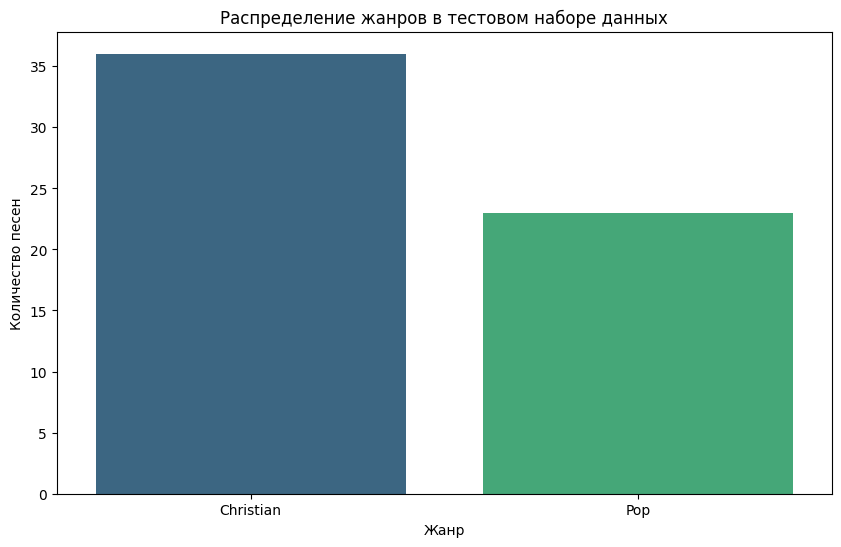

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Распределение жанров в тестовом наборе данных')
plt.xlabel('Жанр')
plt.ylabel('Количество песен')
plt.show()

### Задание 2

In [98]:
dat = pd.read_csv("dataset-lyrics-musics-mini.csv")
columns = dat[['cantorNome', 'letra']]
columns = columns[(columns.cantorNome == 'evanescence') | (columns.cantorNome == 'ac-dc')]

columns['lowered'] = columns['letra'].str.lower()

In [99]:
tokened = columns.apply(lambda row: nltk.word_tokenize(row['lowered']), axis=1)
columns['tokened'] = tokened

noise = stopwords.words('english')
withoutstop = columns['tokened'].apply(lambda x: [item for item in x if item not in noise])
without_stop = []
for a in withoutstop:
    without_stop.append(", ".join(a))
columns['without_stop'] = without_stop

lemmatizer = WordNetLemmatizer()

lemmatized = columns['without_stop'].apply(lambda x: [lemmatizer.lemmatize(x)])
lemma = []
for a in lemmatized:
    lemma.append(", ".join(a))
columns['lemmatized'] = lemma

x_train, x_test, y_train, y_test = train_test_split(columns.lemmatized, columns.cantorNome, train_size = 0.7)
columns.cantorNome.value_counts()

ac-dc          217
evanescence    154
Name: cantorNome, dtype: int64

In [100]:
vectorizer = CountVectorizer(ngram_range=(1, 3))
vectorized_x_train = vectorizer.fit_transform(x_train)

clf = MultinomialNB()
clf.fit(vectorized_x_train, y_train)
vectorized_x_test = vectorizer.transform(x_test)

pred = clf.predict(vectorized_x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       ac-dc       0.95      0.96      0.95        73
 evanescence       0.92      0.90      0.91        39

    accuracy                           0.94       112
   macro avg       0.93      0.93      0.93       112
weighted avg       0.94      0.94      0.94       112

